<p style="text-align: center;">
    Министерство науки и высшего образования Российской Федерации<br>
    Федеральное государственное автономное образовательное учреждение высшего образования «Национальный исследовательский Нижегородский государственный университет им. Н.И. Лобачевского»<br>
    <br>
    Институт Информационных технологий, математики и механики<br>
    <br><br><br>
    Отчет по учебной практике<br>
    <h1 style="text-align: center;">Исследование сигнала ЭКГ с целью выявления сердечно-сосудистых заболеваний посредством нейросетей</h1>
</p>
<br><br><br><br><br>
<p style = "text-align: left; margin-left: 80%;">
    Выполнил:<br>
    студент гр. 381803-1<br>
    <p style = "text-align: left; margin-left: 90%;">
        Мешалкин Н.А.
    </p>
</p>
<br><br><br>
<p style = "text-align: left; margin-left: 80%;">
    Проверил:<br>
    директор ИИТММ, заведующий кафедрой АГДМ<br>
    <p style = "text-align: left; margin-left: 90%;">
        Золотых Ю.Н.
    </p>
</p>
<br><br><br><br>
<p style="text-align: center">
    Нижний Новгород<br>
    2021
</p>

# Введение

**Описание работы:**  
Работа осуществляется с недавно открытой (2019г.) исследовательской базой данных под эгидой Chapman University и Shaoxing People's Hospital для сигналов электрокардиограмм в 12 отведениях. База данных направлена на исследования аритмии и других сердечно-сосудистых заболеваний. Некоторые виды аритмий, такие как мерцательная аритмия, оказывают выраженное негативное влияние на здоровье населения и качество жизни в целом. Так как в современном мире работа осуществляется с большим объемом данных, не всегда исследование "вручную" врачами-кардиологами возможно. Современные инструменты машинного обучения и статистики могут помочь врачам в исследовании. В связи с этим, работа направлена на исследование базы данных, содержащую ЭКГ в 12 отведениях 10 646 пациентов с частотой дискретизации 500 Гц, которая включает 11 распространенных ритмов и 67 дополнительных сердечно-сосудистых заболеваний, все помечены профессиональными экспертами. Набор данных состоит из 10-секундных 12-мерных наборов ЭКГ и соответсвующих меток для каждого объекта.

**Цель работы:**  
Необходимо "обработать" голый сигнал, измеренный в 12 отведениях с частотой дискретизации 500 Гц для 10646 пациентов. Под словом "обработать" стоит иметь ввиду применение сегментируюшей нейросети к нашему сигналу. После получения меток для каждого образца, измерить интересующие нас характеристики (метрики). Далее следует проверить метрики, которые были получены уже на размеченных данных из базы данных. Сравнить результаты.

Данная работа состоит из двух частей:  
1) Работа с размеченными данными, проверка характеристик.  
2) Работа с голым сигналом, применение к голому сигналу сегментирующей нейросети ННГУ,получение размеченных данных, проверка результатов.

## Часть 1:

Рассмотрим размеченную базу данных, содержащую ЭКГ в 12 отведениях 10 646 пациентов с частотой дискретизации 500 Гц, которая включает 11 общих ритмов и 67 дополнительных сердечно-сосудистых заболеваний.

Признаки датасета, их свойства и пояснения приведены в таблице №1.

                                                            Таблица №1.

*Attributes* | *Type* | *Value Range* | *Description* | 
--- | --- | --- | --- |
FileName | String |  | ECG data file name |
Rhythm | String |  | Rhythm Label |
Beat | String |  | Other conditions Label |
PatientAge | Numeric | 0-999 | Age |
Gender | String | MALE/FEMALE | Gender |
VentricularRate | Numeric | 0-999 | Ventricular rate in BPM |
AtrialRate | Numeric | 0-999 | Atrial rate in BPM |
QRSDuration | Numeric | 0-999 | QRS duration in BPM |
QTInterval | Numeric | 0-999 | QT interval in msec |
QTTCorrected | Numeric | 0-999 | Corrected QT interval in msec | 
RAxis | Numeric | -179~180 | R axis |
TAxis | Numeric | -179~181 | T axis |
QRSCount | Numeric | 0-254 | QRS count |
QOnset | Numeric | 16 Bit Unsigned | Q onset |
QOffset | Numeric | 17 Bit Unsigned | Q offset |
TOffset | Numeric | 18 Bit Unsigned | T offset |

Именно такие признаки были получены в ходе извлечения признаков у разработчиков базы данных. К основным признакам добавили возраст и пол из-за их важности почти во всех анализах медицинских данных. Характеристики, извлеченные II-го отведения, включают частоту желудочков в ударах в минуту (VentricularRate), предсердную частоту в ударах в минуту (AtrialRate), продолжительность QRS в миллисекундах (QRSDuration), интервал QT в миллисекундах (QTInterval), ось R (RAxis), ось T (TAxis), количество QRS (QRSCount), начало Q (QOnset), смещение Q (QOffset), среднее значение интервала RR, дисперсия интервала RR, количество интервалов RR.

Таким образом, наш датасет состоит из 10646 объектов/сэмплов (пациенты), у которых признаками являются признаки, полученные в результате исследования голого сигнала ЭКГ (признаки приведены в таблице №1). Нам необходимо будет предсказывать посредством алгоритмов машинного обучения признак Rhytnm, который отображает нарушение сердечного ритма у данного пациента.

Прочитаем данные:

In [2]:
import sklearn
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
data = pd.read_csv("data/Diagnostics.csv",delimiter=';',index_col='FileName')
data

,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
FileName,,,,,,,,,,,,,,,
MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,MALE,117,234,114,356,496,81,-27,19,208,265,386
MUSE_20180112_073319_29000,SB,TWC,59,FEMALE,52,52,92,432,401,76,42,8,215,261,431
MUSE_20180111_165520_97000,SA,NONE,20,FEMALE,67,67,82,382,403,88,20,11,224,265,415
MUSE_20180113_121940_44000,SB,NONE,66,MALE,53,53,96,456,427,34,3,9,219,267,447
MUSE_20180112_122850_57000,AF,STDD STTC,73,FEMALE,162,162,114,252,413,68,-40,26,228,285,354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MUSE_20181222_204306_99000,SVT,NONE,80,FEMALE,196,73,168,284,513,258,244,32,177,261,319
MUSE_20181222_204309_22000,SVT,NONE,81,FEMALE,162,81,162,294,482,110,-75,27,173,254,320
MUSE_20181222_204310_31000,SVT,NONE,39,MALE,152,92,152,340,540,250,38,25,208,284,378


Нас интересует столбец "Rhythm". Рассмотрим его значения подробнее.

In [4]:
data["Rhythm"].value_counts()

SB       3889
SR       1826
AFIB     1780
ST       1568
SVT       587
AF        445
SA        399
AT        121
AVNRT      16
AVRT        8
SAAWR       7
Name: Rhythm, dtype: int64

Видим, что присутствует дисбаланс классов. Чтобы углубиться в проблему, рассмтотрим наши метки и разберемся, что они из себя представляют.  
Классы нашего датасета представлены в таблице №2.


                                                           Таблица №2.

*Acronym Name* | *Full Name* | *Frequency,n(%)* |
--- | --- | --- | 
SB | Sinus Bradycardia | 3.88(36.53) |
SR | Sinus Rhythm | 1.82(17.15) |
Beat | Atrial Fibrillation | 1.7(16.72) | 
PatientAge | Sinus Tachycardia | 1.5(14.73) |
Gender | Atrial Flutter | 445 (4.18) |
VentricularRate | Sinus Irregularity | 399 (3.75) |
AtrialRate | Supraventricular Tachycardia | 587 (5.51) |
QRSDuration | Atrial Tachycardia | 121 (1.14) |
QTInterval | Atrioventicular Node Reentrant Tachycardia | 16 (0.15) | 
QTTCorrected | Atrioventicular Reentrant Tachycardia | 8 (0.07) |
RAxis | Sinus Atrium to Atrial Wandering Rhythm | 7 (0.07) |
All | All | 10.646 (100) |


Поскольку некоторые ритмы имеют крайне мало образцов, по предложению кардиологов следует объединить несколько редких случаев в типы аритмий верхнего уровня.   
Таким образом, 11 ритмов были объединены в 4 группы (SB, AFIB, GSVT, SR), представленные в таблице 3.

**SB включает:**  
1) Синусовую брадикардию (sinus bradycardia (SB))

**AFIB состоит:**  
1) Фибрилляции предсердий (atrial fibrillation (AFIB)),  
2) Трепетания предсердий (and atrial flutter (AF))  
  
**GSVT содержит:**  
1) Наджелудочковая тахикардия (supraventricular tachycardia (SVT)),  
2) Предсердная тахикардия( atrial tachycardia (AT)),  
3) Атриовентрикулярная возвратная тахикардия в узле(atrioventricular node reentrant tachycardia (AVNRT)),  
4) Возвратная атриовентрикулярная тахикардия(atrioventricular reentrant tachycardia (AVRT)),  
5) Синусовое предсердие с блуждающим ритмом предсердий(sinus atrium to atrial wandering rhythm (SAAWR)),  
6) Синусовая тахикардия (sinus Tachycardia (ST))
  
**SR включает:**  
1) Синусовый ритм (sinus rhythm (SR))  
2) Нерегулярность синусового узла (sinus irregularity (SI))

                                                  Таблица №3. Итоговые классы.

*Merged from* | *Merged to* | *Total* |
--- | --- | --- | 
AFIB,AF | AFIB | 3,889 |
SVT,AT,SAAWR,ST,AVNRT,AVRT | GSVT | 2,307 |
SB | SB | 2,225 | 
SR,SI | SR | 2,225 |
All | All | 10,646 |



Объединим классы:

In [5]:
for i in range(0,len(data["Rhythm"])):
    if data['Rhythm'][i]=='AFIB' or data['Rhythm'][i]=='AF':
        data['Rhythm'][i]='AFIB'
    if data['Rhythm'][i]=='SVT' or data['Rhythm'][i]=='AT' or data['Rhythm'][i]=='AVNRT' or data['Rhythm'][i]=='AVRT'  or data['Rhythm'][i]=='ST' or data['Rhythm'][i]=='SAAWR':
        data['Rhythm'][i]='GSVT'
    if data['Rhythm'][i]=='SR' or data['Rhythm'][i]=='SA':
        data['Rhythm'][i]='SR'

In [6]:
data['Rhythm'].value_counts()

SB      3889
GSVT    2307
SR      2225
AFIB    2225
Name: Rhythm, dtype: int64

### Работа с данными:

##### Проверка коррелирующих признаков

In [7]:
corr_mat = data.corr()
corr_mat

,PatientAge,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
PatientAge,1.000000,0.032784,0.123134,0.095891,0.095131,0.240466,-0.253646,0.083759,0.031308,0.018093,0.114092,0.098501
VentricularRate,0.032784,1.000000,0.533340,-0.054847,-0.853169,0.421672,0.091437,0.104201,0.997072,0.011266,-0.048688,-0.846037
AtrialRate,0.123134,0.533340,1.000000,-0.060148,-0.474084,0.252017,0.051855,0.050377,0.530587,0.037640,-0.034009,-0.463366
QRSDuration,0.095891,-0.054847,-0.060148,1.000000,0.196121,0.188760,-0.084620,0.009285,-0.053868,-0.424377,0.719834,0.103680
QTInterval,0.095131,-0.853169,-0.474084,0.196121,1.000000,0.025108,-0.123269,-0.056627,-0.850519,-0.082541,0.141702,0.976715
QTCorrected,0.240466,0.421672,0.252017,0.188760,0.025108,1.000000,-0.048156,0.071952,0.420488,-0.125955,0.100727,-0.002145
RAxis,-0.253646,0.091437,0.051855,-0.084620,-0.123269,-0.048156,1.000000,0.046593,0.090857,0.061945,-0.040955,-0.109254
TAxis,0.083759,0.104201,0.050377,0.009285,-0.056627,0.071952,0.046593,1.000000,0.103753,-0.075576,-0.048233,-0.072584
QRSCount,0.031308,0.997072,0.530587,-0.053868,-0.850519,0.420488,0.090857,0.103753,1.000000,0.010224,-0.048463,-0.843626
QOnset,0.018093,0.011266,0.037640,-0.424377,-0.082541,-0.125955,0.061945,-0.075576,0.010224,1.000000,0.323058,0.133192


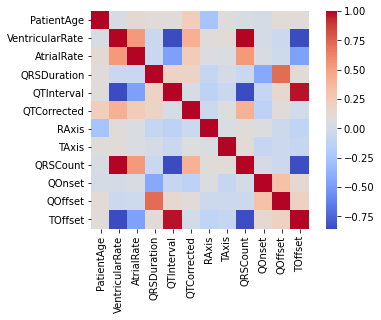

In [8]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Из матрицы корреляции четко видно что, есть некоторое количество коррелирующих между собой признаков. Рассмотрим их подробнее.

In [9]:
corr_mat.where(np.triu(corr_mat > 0.75, k=1)).stack().sort_values(ascending=False)

VentricularRate  QRSCount    0.997072
QTInterval       TOffset     0.976715
dtype: float64

Удалим коррелирующие признаки из нашего датасета.

In [10]:
data=data.drop(['TOffset'], axis = 1)
data=data.drop(['QRSCount'], axis = 1)

corr_mat = data.corr()
corr_mat.where(np.triu(corr_mat > 0.75, k=1)).stack().sort_values(ascending=False)


Series([], dtype: float64)

#####  Приведение данных к одному типу

In [11]:
data_notNull = data.drop(['Beat'], axis=1) #Удаление столбца Beat, из-за большого числа пропущенных значений
data_notNull

,Rhythm,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QOnset,QOffset
FileName,,,,,,,,,,,,
MUSE_20180113_171327_27000,AFIB,85,MALE,117,234,114,356,496,81,-27,208,265
MUSE_20180112_073319_29000,SB,59,FEMALE,52,52,92,432,401,76,42,215,261
MUSE_20180111_165520_97000,SR,20,FEMALE,67,67,82,382,403,88,20,224,265
MUSE_20180113_121940_44000,SB,66,MALE,53,53,96,456,427,34,3,219,267
MUSE_20180112_122850_57000,AFIB,73,FEMALE,162,162,114,252,413,68,-40,228,285
...,...,...,...,...,...,...,...,...,...,...,...,...
MUSE_20181222_204306_99000,GSVT,80,FEMALE,196,73,168,284,513,258,244,177,261
MUSE_20181222_204309_22000,GSVT,81,FEMALE,162,81,162,294,482,110,-75,173,254
MUSE_20181222_204310_31000,GSVT,39,MALE,152,92,152,340,540,250,38,208,284


Воспользуемся функцией Label Encoder. Данная функция маркирует признаки с нечисловыми типами данных и приводит их к числовым.

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(data['Gender'])
data_notNull['Gender']=le.transform(data_notNull['Gender'])
le.fit(data_notNull['Rhythm'])
data_notNull['Rhythm']=le.transform(data_notNull['Rhythm'])
data_notNull=pd.get_dummies(data_notNull, columns=["Gender"])

In [13]:
data_notNull

,Rhythm,PatientAge,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QOnset,QOffset,Gender_0,Gender_1
FileName,,,,,,,,,,,,,
MUSE_20180113_171327_27000,0,85,117,234,114,356,496,81,-27,208,265,0,1
MUSE_20180112_073319_29000,2,59,52,52,92,432,401,76,42,215,261,1,0
MUSE_20180111_165520_97000,3,20,67,67,82,382,403,88,20,224,265,1,0
MUSE_20180113_121940_44000,2,66,53,53,96,456,427,34,3,219,267,0,1
MUSE_20180112_122850_57000,0,73,162,162,114,252,413,68,-40,228,285,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
MUSE_20181222_204306_99000,1,80,196,73,168,284,513,258,244,177,261,1,0
MUSE_20181222_204309_22000,1,81,162,81,162,294,482,110,-75,173,254,1,0
MUSE_20181222_204310_31000,1,39,152,92,152,340,540,250,38,208,284,0,1


##### Проверка выбросов 


Проверим наиболее для нас важные признаки и удалим те объекты из нашего датасета, которые выходят за интервал квантиля (0.005;0.995)

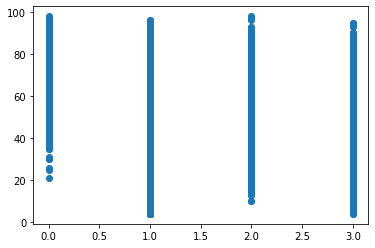

In [14]:
plt.scatter(data_notNull['Rhythm'],data_notNull['PatientAge'])
pass

In [15]:
rows_to_drop = data_notNull[(data_notNull['PatientAge'] < data_notNull['PatientAge'].quantile(0.005)) |
                            (data_notNull['PatientAge'] > data_notNull['PatientAge'].quantile(0.995))].index
data_notNull = data_notNull.drop(rows_to_drop)
data_notNull.shape 

(10551, 13)

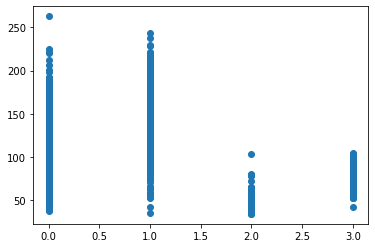

In [16]:
plt.scatter(data_notNull['Rhythm'],data_notNull['VentricularRate'])
pass

In [17]:
rows_to_drop = data_notNull[(data_notNull['VentricularRate'] < data_notNull['VentricularRate'].quantile(0.005)) |
                            (data_notNull['VentricularRate'] > data_notNull['VentricularRate'].quantile(0.995))].index
data_notNull = data_notNull.drop(rows_to_drop)
data_notNull.shape 

(10462, 13)

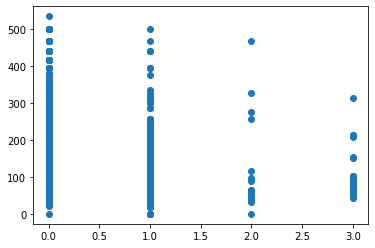

In [18]:
plt.scatter(data_notNull['Rhythm'],data_notNull['AtrialRate'])
pass

In [19]:
rows_to_drop = data_notNull[(data_notNull['AtrialRate'] < data_notNull['AtrialRate'].quantile(0.005)) |
                            (data_notNull['AtrialRate'] > data_notNull['AtrialRate'].quantile(0.995))].index
data_notNull = data_notNull.drop(rows_to_drop)
data_notNull.shape 

(10374, 13)

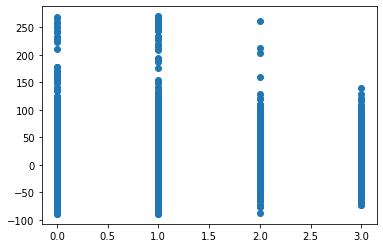

In [20]:
plt.scatter(data_notNull['Rhythm'],data_notNull['RAxis'])
pass

In [21]:
rows_to_drop = data_notNull[(data_notNull['RAxis'] < data_notNull['RAxis'].quantile(0.005)) |
                            (data_notNull['RAxis'] > data_notNull['RAxis'].quantile(0.995))].index
data_notNull = data_notNull.drop(rows_to_drop)
data_notNull.shape 

(10273, 13)

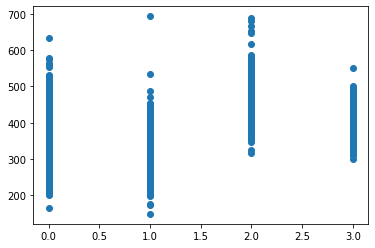

In [22]:
plt.scatter(data_notNull['Rhythm'],data_notNull['QTInterval'])
pass

In [23]:
rows_to_drop = data_notNull[(data_notNull['QTInterval'] < data_notNull['QTInterval'].quantile(0.005)) |
                            (data_notNull['QTInterval'] > data_notNull['QTInterval'].quantile(0.995))].index
data_notNull = data_notNull.drop(rows_to_drop)
data_notNull.shape 

(10173, 13)

### Разделение данных на тренировочную и тестовую выборки:

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit
import imblearn

Выделем наш целевой столбец.

In [25]:
y=data_notNull['Rhythm']
data_notNull.pop('Rhythm')
X=data_notNull

In [26]:
y.value_counts()

2    3810
3    2198
1    2097
0    2068
Name: Rhythm, dtype: int64

Посмотрим на наши 4 итоговых класса. Видим, что есть небольшая несбалансированность классов (Но для частоты эксперимента не будем с ней бороться).

Проведем нормализацию данных.

In [27]:
from sklearn.preprocessing import scale
X_scaled=scale(X)
X_scaled

array([[ 1.47534442,  1.0756389 ,  2.60433182, ...,  0.0411852 ,
        -0.89383387,  0.89383387],
       [-0.00989983, -0.95031815, -0.69547157, ..., -0.45187399,
         1.11877613, -1.11877613],
       [-2.23776621, -0.4827896 , -0.42350975, ...,  0.0411852 ,
         1.11877613, -1.11877613],
       ...,
       [-1.32376975,  2.13537028,  1.09947643, ..., -0.3286092 ,
        -0.89383387,  0.89383387],
       [ 1.2468453 ,  2.47822455, -0.16967872, ..., -1.31472759,
         1.11877613, -1.11877613],
       [ 0.96122141,  2.88341596,  1.5890077 , ...,  0.5342444 ,
        -0.89383387,  0.89383387]])

Разделим данные на тестовую (25%) и тренировочную выборки (75%).

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25,stratify=y, random_state=42)
#мое

In [29]:
X_train.shape

(7629, 12)

In [30]:
y_train.value_counts()

2    2857
3    1648
1    1573
0    1551
Name: Rhythm, dtype: int64

#### Тренировка и оценка модели.

В качестве метрик рассмотрим f1score и confusion matrix. В данных условиях они являются более репрезетативными.

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#### SVC

In [32]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [33]:
y_pred=clf.predict(X_test)

print("recall test: ",recall_score(y_test.values, y_pred,average='macro'))
print("presion test: ",precision_score(y_test.values,y_pred ,average='macro'))
print("f1_score test: ",f1_score(y_test.values, y_pred,average='macro'))

recall test:  0.8342013626368103
presion test:  0.8403142803967811
f1_score test:  0.834496180480217


In [34]:
confusion_matrix(y_test.values, y_pred)
conf_mx = confusion_matrix(y_test.values, y_pred) #посылаем предсказанные значения и истинные
conf_mx

array([[317, 110,  25,  65],
       [ 62, 456,   0,   6],
       [  5,   0, 945,   3],
       [ 30,  11,  35, 474]], dtype=int64)

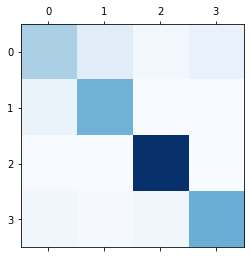

In [35]:
plt.matshow(conf_mx, cmap=plt.cm.Blues) 
plt.show() 

#### KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import ShuffleSplit
clf = KNeighborsClassifier()
cv = ShuffleSplit(n_splits=3, random_state=42)

clf.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
y_pred=clf.predict(X_test)

print("recall test: ",recall_score(y_test.values, y_pred,average='macro'))
print("presion test: ",precision_score(y_test.values,y_pred ,average='macro'))
print("f1_score test: ",f1_score(y_test.values, y_pred,average='macro'))

recall test:  0.786290505439629
presion test:  0.8021542872222893
f1_score test:  0.7902168584936935


In [38]:
confusion_matrix(y_test.values, y_pred)
conf_mx = confusion_matrix(y_test.values, y_pred) 
conf_mx

array([[308, 116,  40,  53],
       [ 73, 444,   0,   7],
       [  8,   0, 929,  16],
       [ 32,  19,  99, 400]], dtype=int64)

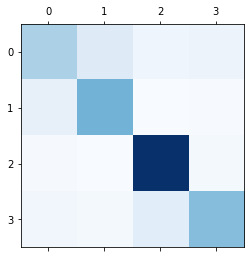

In [39]:
plt.matshow(conf_mx, cmap=plt.cm.Blues) 
plt.show() 

#### RandomForest

In [40]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
y_pred=clf.predict(X_test)

print("recall test: ",recall_score(y_test.values, y_pred,average='macro'))
print("presion test: ",precision_score(y_test.values,y_pred ,average='macro'))
print("f1_score test: ",f1_score(y_test.values, y_pred,average='macro'))

recall test:  0.888597594245684
presion test:  0.8896411365103502
f1_score test:  0.8883430281804541


In [42]:
confusion_matrix(y_test.values, y_pred)
conf_mx = confusion_matrix(y_test.values, y_pred) 
conf_mx

array([[380,  72,  12,  53],
       [ 51, 466,   0,   7],
       [  5,   0, 947,   1],
       [ 27,   3,   5, 515]], dtype=int64)

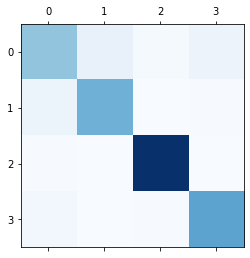

In [43]:
plt.matshow(conf_mx, cmap=plt.cm.Blues) 
plt.show() 

#### GradientBoostingClassifier

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [45]:
y_pred=clf.predict(X_test)

print("recall test: ",recall_score(y_test.values, y_pred,average='macro'))
print("presion test: ",precision_score(y_test.values,y_pred ,average='macro'))
print("f1_score test: ",f1_score(y_test.values, y_pred,average='macro'))


recall test:  0.893104400984503
presion test:  0.8943229287437973
f1_score test:  0.8926508184495053


In [46]:
confusion_matrix(y_test.values, y_pred)
conf_mx = confusion_matrix(y_test.values, y_pred)
conf_mx

array([[381,  73,  12,  51],
       [ 54, 463,   0,   7],
       [  4,   0, 947,   2],
       [ 17,   2,   4, 527]], dtype=int64)

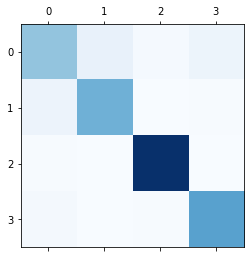

In [47]:
plt.matshow(conf_mx, cmap=plt.cm.Blues) 
plt.show() 

#### Neural network

In [48]:
#Подключаем библиотеки
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [49]:
X

,PatientAge,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QOnset,QOffset,Gender_0,Gender_1
FileName,,,,,,,,,,,,
MUSE_20180113_171327_27000,85,117,234,114,356,496,81,-27,208,265,0,1
MUSE_20180112_073319_29000,59,52,52,92,432,401,76,42,215,261,1,0
MUSE_20180111_165520_97000,20,67,67,82,382,403,88,20,224,265,1,0
MUSE_20180113_121940_44000,66,53,53,96,456,427,34,3,219,267,0,1
MUSE_20180112_122850_57000,73,162,162,114,252,413,68,-40,228,285,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
MUSE_20181222_204248_77000,23,181,159,74,252,437,69,-1,228,265,1,0
MUSE_20181222_204249_88000,69,178,170,122,308,530,57,225,203,264,0,1
MUSE_20181222_204303_61000,36,151,151,88,274,434,67,12,218,262,0,1


In [50]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(12,)),
    keras.layers.Dense(300, activation=tf.nn.tanh),
    keras.layers.Dense(200, activation=tf.nn.tanh),
    keras.layers.Dense(80, activation=tf.nn.tanh),
    keras.layers.Dense(4, activation=tf.nn.softmax)
])

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 12)                0         
_________________________________________________________________
dense (Dense)                (None, 300)               3900      
_________________________________________________________________
dense_1 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_2 (Dense)              (None, 80)                16080     
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 324       
Total params: 80,504
Trainable params: 80,504
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

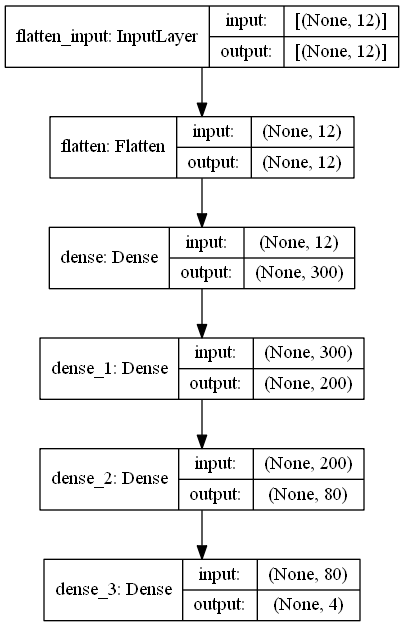

In [53]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [54]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
239/239 [==============================] - 3s 3ms/step - loss: 0.5581 - accuracy: 0.7683
Epoch 2/20
239/239 [==============================] - 1s 3ms/step - loss: 0.3851 - accuracy: 0.8542
Epoch 3/20
239/239 [==============================] - 1s 3ms/step - loss: 0.3551 - accuracy: 0.8577
Epoch 4/20
239/239 [==============================] - 1s 3ms/step - loss: 0.3460 - accuracy: 0.8651
Epoch 5/20
239/239 [==============================] - 1s 3ms/step - loss: 0.3139 - accuracy: 0.8784
Epoch 6/20
239/239 [==============================] - 1s 4ms/step - loss: 0.3189 - accuracy: 0.8732
Epoch 7/20
239/239 [==============================] - 1s 4ms/step - loss: 0.2852 - accuracy: 0.8948
Epoch 8/20
239/239 [==============================] - 1s 4ms/step - loss: 0.2714 - accuracy: 0.8988
Epoch 9/20
239/239 [==============================] - 1s 4ms/step - loss: 0.2470 - accuracy: 0.9078
Epoch 10/20
239/239 [==============================] - 1s 4ms/step - loss: 0.2432 - accuracy: 0.9074

In [55]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

80/80 [==============================] - 1s 3ms/step - loss: 0.2639 - accuracy: 0.9049
Test accuracy: 0.9048742055892944


Лучшим алгоритмом является нейронная сеть. Она показала лучшую точность ~92%.  
Таким образом мы провели исследование размеченных данных, которые нам были предоставлены базой данных Chapman University и Shaoxing People's Hospital. Теперь нам следует собственноручно провести исследование над голым сигналом и получить свои размеченные данные.

## Часть 2:

Рассмотрим сигналы электрокардиограммы в 12 отведениях (5000 образцов). Напомним, что для каждого испытуемого доступен сигнал длиной в 10 секунд. Общее количество испытуемых: 10646 человек.

Рассмотрим, случайно взятого пациента.

In [56]:
data = pd.read_csv("ECGData/MUSE_20180111_155115_19000.csv",delimiter=',')
data 

,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,-214.72,-229.36,-14.64,224.48,-102.48,-122.00,614.88,814.96,912.56,126.88,-239.12,-507.52
1,-200.08,-209.84,-9.76,204.96,-97.60,-112.24,605.12,819.84,927.20,165.92,-195.20,-463.60
2,-190.32,-195.20,-4.88,195.20,-92.72,-102.48,600.24,829.60,956.48,204.96,-151.28,-429.44
3,-165.92,-165.92,0.00,165.92,-82.96,-82.96,590.48,844.24,971.12,239.12,-117.12,-400.16
4,-161.04,-156.16,4.88,161.04,-82.96,-78.08,585.60,844.24,985.76,273.28,-78.08,-370.88
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-117.12,9.76,126.88,53.68,-122.00,68.32,439.20,634.40,800.32,278.16,0.00,-273.28
4996,-102.48,14.64,117.12,43.92,-112.24,63.44,424.56,634.40,819.84,297.68,24.40,-248.88
4997,-92.72,29.28,122.00,34.16,-107.36,73.20,424.56,644.16,829.60,312.32,43.92,-229.36
4998,-92.72,34.16,126.88,29.28,-112.24,78.08,424.56,644.16,829.60,312.32,58.56,-204.96


Напомню, что мы будем использовать нейронную сеть для сегментации сигналов на p, qrs и t сегменты. Результат сохраняется в виде формата json там же, где лежат сами сигналы.

In [57]:
# import json
# import matplotlib.pyplot as plt
# import numpy as np
# import torch
# import pandas as pd
# import wfdb

# sample_rate = 500
# path_to_model = "Segmentation/"
# path_to_data = "data/"

# class Delineation:
#     def __init__(self):
#         self._model = torch.jit.load(path_to_model + "model.pt")
#         self._max_dist = int(0.03 * sample_rate)
#         self._border = int(0.8 * sample_rate)
        
#     def _remove_small(self, signal):
#         last_zero = 0
#         for i in range(len(signal)):
#             if signal[i] == 0:
#                 if i - last_zero < self._max_dist:
#                     signal[last_zero:i] = 0
#                 last_zero = i

#     def _merge_small(self, signal):
#         lasts = np.full(signal.max() + 1, -(self._max_dist+1))
#         for i in range(len(signal)):
#             m = signal[i]
#             if i - lasts[m] < self._max_dist and m > 0:
#                 signal[lasts[m]:i] = m
#             lasts[m] = i

#     def _mask_to_delineation(self, data):
#         masks = np.argmax(data, 1)
#         delineation = []
#         v_to_del = {0:'none', 1:'p', 2:'qrs', 3:'t'}
#         for rec in masks:
#             self._merge_small(rec)
#             self._remove_small(rec)
#             rec_del = []
#             i = 0
#             rec_len = len(rec)
#             while i < rec_len:
#                 v = rec[i]
#                 if v > 0:
#                     rec_del.append({
#                         "begin": i,
#                         "end": 0,
#                         "type": v_to_del[v]
#                     })
#                     while i < rec_len and rec[i] == v:
#                         rec_del[-1]["end"] = i
#                         i += 1
#                     t = rec_del[-1]
#                     if t["begin"] < self._border or t["end"] > rec_len - self._border:
#                         rec_del.pop()
#                 i += 1
#             d_res = []
#             for c, n in zip(rec_del[:-1], rec_del[1:]):
#                 d_res.append(c)
#                 d_res.append({
#                     "begin": c["end"],
#                     "end": n["begin"],
#                     "type": "none"
#                 })
#             if rec_del:
#                 begin = {
#                     "begin": 0,
#                     "end": rec_del[0]["begin"],
#                     "type": "none"
#                 }
#                 end = {
#                     "begin": rec_del[-1]["end"],
#                     "end": rec_len,
#                     "type": "none"
#                 }
#                 d_res = [begin] + d_res + [rec_del[-1], end]
#             else:
#                 d_res.append({
#                     "begin": 0,
#                     "end": rec_len,
#                     "type": "none"
#                 })
#             delineation.append(d_res)
#         return delineation

#     def __call__(self, signal):
#         signal = torch.FloatTensor(np.expand_dims(signal, axis=1))
#         masks = self._model(signal).data.numpy()
#         return self._mask_to_delineation(masks)

# def main():
#     database_info = pd.read_csv(path_to_data+"Diagnostics.csv",delimiter=';')
#     delineation = Delineation()
#     i = 0
#     for f in database_info['FileName']:
#         signal = pd.read_csv("ECGDataDenoised/"+f+'.csv',delimiter=',')
#         data = np.array(signal)
#         data_transp = np.transpose(data)
#         result = delineation(data_transp)
#         with open(path_to_data + f + ".json", "w") as write_file:
#             json.dump(result, write_file)
#         print(i, " record passed")
#         i+=1

# if __name__ == "__main__":
#     main()

Теперь необходимо выделить нужные нам характеристики.

In [58]:
ch_names = ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
attr_names = ['P_AV', 'P_DEV', 'QRS_AV', 'QRS_DEV', 'T_AV', 'T_DEV', 'PR_INT_AV', 'PR_INT_DEV', 'PR_SEGM_AV', 'PR_SEGM_DEV', 'ST_SEGM_AV',  'ST_SEGM_DEV', 'QT_INT_AV', 'QT_INT_DEV']
attributes = ["Gender", "PatientAge"]
for attr_name in attr_names:
    attributes.append('ALL_C_' + attr_name)
for ch_name in ch_names:
    for attr_name in attr_names:
        attributes.append(ch_name + '_C_' + attr_name)
macro_data = pd.DataFrame(columns=attributes)
macro_data

,Gender,PatientAge,ALL_C_P_AV,ALL_C_P_DEV,ALL_C_QRS_AV,ALL_C_QRS_DEV,ALL_C_T_AV,ALL_C_T_DEV,ALL_C_PR_INT_AV,ALL_C_PR_INT_DEV,...,V6_C_T_AV,V6_C_T_DEV,V6_C_PR_INT_AV,V6_C_PR_INT_DEV,V6_C_PR_SEGM_AV,V6_C_PR_SEGM_DEV,V6_C_ST_SEGM_AV,V6_C_ST_SEGM_DEV,V6_C_QT_INT_AV,V6_C_QT_INT_DEV


In [59]:
data = pd.read_csv("data/Diagnostics.csv",delimiter=';')
data

,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,MALE,117,234,114,356,496,81,-27,19,208,265,386
1,MUSE_20180112_073319_29000,SB,TWC,59,FEMALE,52,52,92,432,401,76,42,8,215,261,431
2,MUSE_20180111_165520_97000,SA,NONE,20,FEMALE,67,67,82,382,403,88,20,11,224,265,415
3,MUSE_20180113_121940_44000,SB,NONE,66,MALE,53,53,96,456,427,34,3,9,219,267,447
4,MUSE_20180112_122850_57000,AF,STDD STTC,73,FEMALE,162,162,114,252,413,68,-40,26,228,285,354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10641,MUSE_20181222_204306_99000,SVT,NONE,80,FEMALE,196,73,168,284,513,258,244,32,177,261,319
10642,MUSE_20181222_204309_22000,SVT,NONE,81,FEMALE,162,81,162,294,482,110,-75,27,173,254,320
10643,MUSE_20181222_204310_31000,SVT,NONE,39,MALE,152,92,152,340,540,250,38,25,208,284,378
10644,MUSE_20181222_204312_58000,SVT,NONE,76,MALE,175,178,128,310,529,98,-83,29,205,269,360


Добавим из нашего датасета, с которым работали в начале, в наш новый датасет возраст и пол пациента.

In [60]:
macro_data["Gender"]=data["Gender"]
macro_data["PatientAge"]=data["PatientAge"]
macro_data

,Gender,PatientAge,ALL_C_P_AV,ALL_C_P_DEV,ALL_C_QRS_AV,ALL_C_QRS_DEV,ALL_C_T_AV,ALL_C_T_DEV,ALL_C_PR_INT_AV,ALL_C_PR_INT_DEV,...,V6_C_T_AV,V6_C_T_DEV,V6_C_PR_INT_AV,V6_C_PR_INT_DEV,V6_C_PR_SEGM_AV,V6_C_PR_SEGM_DEV,V6_C_ST_SEGM_AV,V6_C_ST_SEGM_DEV,V6_C_QT_INT_AV,V6_C_QT_INT_DEV
0,MALE,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FEMALE,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FEMALE,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MALE,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FEMALE,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10641,FEMALE,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10642,FEMALE,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10643,MALE,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10644,MALE,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Теперь выделим необходимы для работы признаки:

*Short Name* | *Description* | 
--- | --- | 
P_AV | Average values of the length wave p |
QRS_AV | Average values of the length qrs | 
QRS_DEV | Dispersion qrs| 
T_AV | Average values of the length wave t |
T_DEV | Dispersion wave t | 
PR_INT_AV | Average values of the pr interval | 
PR_INT_DEV | Dispersion of the pr interval | 
PR_SEGM_AV | Average values of the pr segment | 
PR_SEGM_DEV | Dispersion of the pr segment |  
ST_SEGM_AV | Average values of the st segment | 
ST_SEGM_DEV | Dispersion of the st segment | 
QT_INT_AV | Average values of the qt interval | 
QT_INT_DEV | Dispersion of the qt interval |

In [61]:
sample_rate = 500
path_to_model = "Segmentation/"
path_to_data = "data/"

In [ ]:
import json


from ipywidgets import IntProgress
from IPython.display import display

progress = IntProgress(min=0, max=len(macro_data.index), value=0)
display(progress)
for i, record in enumerate(data.iloc):
    record_data = json.load(open(path_to_data + record.FileName + ".json", 'r'))
    # список средних значений длины p волны с каждого из 12 отведений
    p_mean_list = []
    # список дисперсий длины p волны с каждого из 12 отведений
    p_dis_list = []
    # список средних значений длины qrs комплекса с каждого из 12 отведений
    qrs_mean_list = []
    # список дисперсий длины qrs комплекса с каждого из 12 отведений
    qrs_dis_list = []
    # список средних значений длины t волны с каждого из 12 отведений
    t_mean_list = []
    # список дисперсий длины t волны с каждого из 12 отведений
    t_dis_list = []
    # список средних значений длины pr интервала с каждого из 12 отведений
    pr_int_mean_list = []
    # список дисперсий длины pr интервала с каждого из 12 отведений
    pr_int_dis_list = []
    # список средних значений длины pr сегмента с каждого из 12 отведений
    pr_seg_mean_list = []
    # список дисперсий длины pr сегмента с каждого из 12 отведений
    pr_seg_dis_list = []
    # список средних значений длины st сегмента с каждого из 12 отведений
    st_seg_mean_list = []
    # список дисперсий длины st сегмента с каждого из 12 отведений
    st_seg_dis_list = []
    # список средних значений длины qt интервала с каждого из 12 отведений
    qt_int_mean_list = []
    # список дисперсий длины qt интервала с каждого из 12 отведений
    qt_int_dis_list = []
    for ch_num, chanel in enumerate(record_data):
        # списки длин соответствующих волн, комплексов, интервалов
        p_list = []
        qrs_list = []
        t_list = []
        pr_int_list = []
        pr_seg_list = []
        st_seg_list = []
        qt_int_list = []
        for wave_num, wave in enumerate(chanel):
            if wave['type'] == 'p':
                # Собираем длины p волн в список
                p_list.append(wave['end'] - wave['begin'])
                # Собираем длины pr интервалов и pr сегментов
                if wave_num < len(chanel) - 2:
                    if (chanel[wave_num + 1]['type'] == 'qrs'):
                        pr_int_list.append(chanel[wave_num + 1]['begin'] - wave['begin'])
                        pr_seg_list.append(0)
                    if (chanel[wave_num + 2]['type'] == 'qrs'):
                        pr_int_list.append(chanel[wave_num + 2]['begin'] - wave['begin'])
                        pr_seg_list.append(chanel[wave_num + 2]['begin'] - wave['end'])
            if wave['type'] == 'qrs':
                # Собираем длины qrs комплексов в список
                qrs_list.append(wave['end'] - wave['begin'])
                # Собираем длины st сегментов и qt интервалов
                if wave_num < len(chanel) - 2:
                    if (chanel[wave_num + 1]['type'] == 't'):
                        qt_int_list.append(chanel[wave_num + 1]['end'] - wave['begin'])
                        st_seg_list.append(0)
                    if (chanel[wave_num + 2]['type'] == 't'):
                        qt_int_list.append(chanel[wave_num + 2]['end'] - wave['begin'])
                        st_seg_list.append(chanel[wave_num + 2]['begin'] - wave['end'])
            if wave['type'] == 't':
                # Собираем длины t волн
                t_list.append(wave['end'] - wave['begin'])
        # Добавляем средние значения и дисперсии в списки
        p_mean = 0
        p_dis = 0
        if (len(p_list) > 0):
            p_mean = sum(p_list) / len(p_list)
            p_dis = sum((p - p_mean) ** 2 for p in p_list) / len(p_list)
        p_mean_list.append(p_mean)
        macro_data.loc[macro_data.index[i], ch_names[ch_num] + '_C_' + 'P_AV'] = p_mean * 1000 / sample_rate
        p_dis_list.append(p_dis)
        macro_data.loc[macro_data.index[i], ch_names[ch_num] + '_C_' + 'P_DEV'] = p_dis ** 0.5 * 1000 / sample_rate

        qrs_mean = 0
        qrs_dis = 0
        if (len(qrs_list) > 0):
            qrs_mean = sum(qrs_list) / len(qrs_list)
            qrs_dis = sum((qrs - qrs_mean) ** 2 for qrs in qrs_list) / len(qrs_list)
        qrs_mean_list.append(qrs_mean)
        macro_data.loc[macro_data.index[i], ch_names[ch_num] + '_C_' + 'QRS_AV'] = qrs_mean * 1000 / sample_rate
        qrs_dis_list.append(qrs_dis)
        macro_data.loc[macro_data.index[i], ch_names[ch_num] + '_C_' + 'QRS_DEV'] = qrs_dis ** 0.5 * 1000 / sample_rate
        
        t_mean = 0
        t_dis = 0
        if (len(t_list) > 0):
            t_mean = sum(t_list) / len(t_list)
            t_dis = sum((t - t_mean) ** 2 for t in t_list) / len(t_list)
        t_mean_list.append(t_mean)
        macro_data.loc[macro_data.index[i], ch_names[ch_num] + '_C_' + 'T_AV'] = t_mean * 1000 / sample_rate
        t_dis_list.append(t_dis)
        macro_data.loc[macro_data.index[i], ch_names[ch_num] + '_C_' + 'T_DEV'] = t_dis ** 0.5 * 1000 / sample_rate

        pr_int_mean = 0
        pr_int_dis = 0
        if (len(pr_int_list) > 0):
            pr_int_mean = sum(pr_int_list) / len(pr_int_list)
            pr_int_dis = sum((pr_int - pr_int_mean) ** 2 for pr_int in pr_int_list) / len(pr_int_list)
        pr_int_mean_list.append(pr_int_mean)
        macro_data.loc[macro_data.index[i], ch_names[ch_num] + '_C_' + 'PR_INT_AV'] = pr_int_mean * 1000 / sample_rate
        pr_int_dis_list.append(pr_int_dis)
        macro_data.loc[macro_data.index[i], ch_names[ch_num] + '_C_' + 'PR_INT_DEV'] = pr_int_dis ** 0.5 * 1000 / sample_rate

        pr_seg_mean = 0
        pr_seg_dis = 0
        if (len(pr_seg_list) > 0):
            pr_seg_mean = sum(pr_seg_list) / len(pr_seg_list)
            pr_seg_dis = sum((pr_seg - pr_seg_mean) ** 2 for pr_seg in pr_seg_list) / len(pr_seg_list)
        pr_seg_mean_list.append(pr_seg_mean)
        macro_data.loc[macro_data.index[i], ch_names[ch_num] + '_C_' + 'PR_SEGM_AV'] = pr_seg_mean * 1000 / sample_rate
        pr_seg_dis_list.append(pr_seg_dis)
        macro_data.loc[macro_data.index[i], ch_names[ch_num] + '_C_' + 'PR_SEGM_DEV'] = pr_seg_dis ** 0.5 * 1000 / sample_rate

        st_seg_mean = 0
        st_seg_dis = 0
        if (len(st_seg_list) > 0):
            st_seg_mean = sum(st_seg_list) / len(st_seg_list)
            st_seg_dis = sum((st_seg - st_seg_mean) ** 2 for st_seg in st_seg_list) / len(st_seg_list)
        st_seg_mean_list.append(st_seg_mean)
        macro_data.loc[macro_data.index[i], ch_names[ch_num] + '_C_' + 'ST_SEGM_AV'] = st_seg_mean * 1000 / sample_rate
        st_seg_dis_list.append(st_seg_dis)
        macro_data.loc[macro_data.index[i], ch_names[ch_num] + '_C_' + 'ST_SEGM_DEV'] = st_seg_dis ** 0.5 * 1000 / sample_rate

        qt_int_mean = 0
        qt_int_dis = 0
        if (len(qt_int_list) > 0):
            qt_int_mean = sum(qt_int_list) / len(qt_int_list)
            qt_int_dis = sum((qt_int - qt_int_mean) ** 2 for qt_int in qt_int_list) / len(qt_int_list)
        qt_int_mean_list.append(qt_int_mean)
        macro_data.loc[macro_data.index[i], ch_names[ch_num] + '_C_' + 'QT_INT_AV'] = qt_int_mean * 1000 / sample_rate
        qt_int_dis_list.append(qt_int_dis)
        macro_data.loc[macro_data.index[i], ch_names[ch_num] + '_C_' + 'QT_INT_DEV'] = qt_int_dis ** 0.5 * 1000 / sample_rate
    macro_data.loc[macro_data.index[i], 'ALL_C_' + 'P_AV'] = sum(p_mean_list) / len(p_mean_list) * 1000 / sample_rate
    macro_data.loc[macro_data.index[i], 'ALL_C_' + 'P_DEV'] = (sum(p_dis_list) / len(p_dis_list)) ** 0.5 * 1000 / sample_rate
    macro_data.loc[macro_data.index[i], 'ALL_C_' + 'QRS_AV'] = sum(qrs_mean_list) / len(qrs_mean_list) * 1000 / sample_rate
    macro_data.loc[macro_data.index[i], 'ALL_C_' + 'QRS_DEV'] = (sum(qrs_dis_list) / len(qrs_dis_list)) ** 0.5 * 1000 / sample_rate
    macro_data.loc[macro_data.index[i], 'ALL_C_' + 'T_AV'] = sum(t_mean_list) / len(t_mean_list) * 1000 / sample_rate
    macro_data.loc[macro_data.index[i], 'ALL_C_' + 'T_DEV'] = (sum(t_dis_list) / len(t_dis_list)) ** 0.5 * 1000 / sample_rate
    macro_data.loc[macro_data.index[i], 'ALL_C_' + 'PR_INT_AV'] = sum(pr_int_mean_list) / len(pr_int_mean_list) * 1000 / sample_rate
    macro_data.loc[macro_data.index[i], 'ALL_C_' + 'PR_INT_DEV'] = (sum(pr_int_dis_list) / len(pr_int_dis_list)) ** 0.5 * 1000 / sample_rate
    macro_data.loc[macro_data.index[i], 'ALL_C_' + 'PR_SEGM_AV'] = sum(pr_seg_mean_list) / len(pr_seg_mean_list) * 1000 / sample_rate
    macro_data.loc[macro_data.index[i], 'ALL_C_' + 'PR_SEGM_DEV'] = (sum(pr_seg_dis_list) / len(pr_seg_dis_list)) ** 0.5 * 1000 / sample_rate
    macro_data.loc[macro_data.index[i], 'ALL_C_' + 'ST_SEGM_AV'] = sum(st_seg_mean_list) / len(st_seg_mean_list) * 1000 / sample_rate
    macro_data.loc[macro_data.index[i], 'ALL_C_' + 'ST_SEGM_DEV'] = (sum(st_seg_dis_list) / len(st_seg_dis_list)) ** 0.5 * 1000 / sample_rate
    macro_data.loc[macro_data.index[i], 'ALL_C_' + 'QT_INT_AV'] = sum(qt_int_mean_list) / len(qt_int_mean_list) * 1000 / sample_rate
    macro_data.loc[macro_data.index[i], 'ALL_C_' + 'QT_INT_DEV'] = (sum(qt_int_dis_list) / len(qt_int_dis_list)) ** 0.5 * 1000 / sample_rate
    progress.value = i
macro_data

IntProgress(value=0, max=10646)

Теперь добавим диагнозы из нашего изначального датасета.

In [ ]:
macro_data["Rhythm"] = data["Rhythm"]
macro_data

Теперь, собрав все нужные нам характеристики у нашего нового датасета, можем проверить метрики точности предсказания диагноза.

Сделаем как в прошлый раз объединение в супер классы.

In [ ]:
for i in range(0,len(data["Rhythm"])):
    if macro_data['Rhythm'][i]=='AFIB' or macro_data['Rhythm'][i]=='AF':
        macro_data['Rhythm'][i]='AFIB'
    if macro_data['Rhythm'][i]=='SVT' or macro_data['Rhythm'][i]=='AT' or macro_data['Rhythm'][i]=='AVNRT' or macro_data['Rhythm'][i]=='AVRT'  or macro_data['Rhythm'][i]=='ST' or macro_data['Rhythm'][i]=='SAAWR':
        macro_data['Rhythm'][i]='GSVT'
    if macro_data['Rhythm'][i]=='SR' or macro_data['Rhythm'][i]=='SA':
        macro_data['Rhythm'][i]='SR'

In [ ]:
le = preprocessing.LabelEncoder()

le.fit(macro_data['Gender'])
macro_data['Gender']=le.transform(macro_data['Gender'])
le.fit(macro_data['Rhythm'])
macro_data['Rhythm']=le.transform(macro_data['Rhythm'])
macro_data=pd.get_dummies(macro_data, columns=["Gender"])

In [ ]:
y=macro_data['Rhythm']
macro_data.pop('Rhythm')
X=macro_data

In [ ]:
X_scaled=scale(X)
X_scaled

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25,stratify=y, random_state=42)
#мое

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(185,)),
    keras.layers.Dense(600, activation=tf.nn.tanh),
    keras.layers.Dense(400, activation=tf.nn.tanh),
    keras.layers.Dense(100, activation=tf.nn.tanh),
    keras.layers.Dense(20, activation=tf.nn.tanh),
    keras.layers.Dense(4, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=12)

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Вывод:

В первой части работы мы провели исследование над уже готовыми размеченными данными, которые нам предоставили Chapman University и Shaoxing People's Hospital. На этих данных точность предсказания достигла максимума (91% точности) при использовании неглубокой нейронной сети с 4-мя нелинейными слоями. Во второй части работы мы разметили вручную голый сигнал с добавлением двух признаков из размеченных данных (пол и возраст). По результатам, полученным после нашей собственной разметки данных (83%) можно сделать вывод о том, что наша разметка оказалась хуже, чем "заводская". Таким образом, в следующей работе предстоит наилучшим образом разметить данные, чтобы увеличить точность.